In [1]:
import cv2,sys,os
import numpy as np
from Algorithm.lbph import getLBPimage,blockshaped,histogram
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
haar_file = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

In [3]:
dataset = './Data/MUCT'
(height,width) = (100,130)
(images,labels,names,id) = ([],[],{},0)

for (subdirs,dirs,files) in os.walk(dataset):
        for subdir in dirs:
            names[id]=subdir
            subjectpath=os.path.join(dataset,subdir)
            for filename in os.listdir(subjectpath):
                path=subjectpath+'/'+filename
                lable=id
                img = cv2.imread(path)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray,1.3,4)
                for (x,y,w,h) in faces:
                    face = gray[y:y+h,x:x+w]
                    face = cv2.resize(face,(width,height))
                    images.append(face)
                    labels.append(int(lable))
            id+=1

In [4]:
len(images)

3661

In [5]:
id

278

In [6]:
(iages,labels) = [np.array(lis) for lis in [images,labels]]

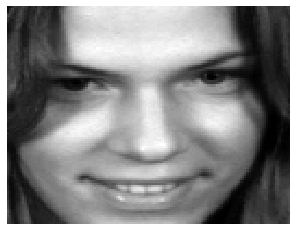

In [7]:
plt.imshow(images[4],cmap='gray')
plt.axis('off')
plt.show()

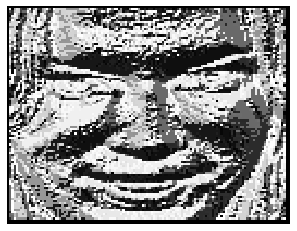

In [8]:
lbp_image = getLBPimage(images[4])
plt.imshow(lbp_image,cmap='gray')
plt.axis('off')
plt.show()

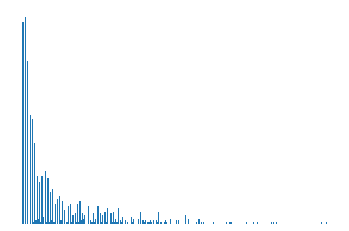

In [9]:
shaped = blockshaped(lbp_image,10,13)
    
xBlocks = []
for s in shaped:
    xBlocks.append(histogram(s))
lbph = np.concatenate(xBlocks)

plt.hist(lbph,bins=2**8)
plt.axis('off')
plt.show()

In [ ]:
x = []

for img in images:
    lbp = getLBPimage(img)
    shaped = blockshaped(lbp,10,13)
    
    xBlocks = []
    for s in shaped:
        xBlocks.append(histogram(s))
    lbph = np.concatenate(xBlocks)
    
    x.append(lbph)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,labels,test_size=0.2)

In [ ]:
pca = PCA(n_components=90, whiten=True)
pca.fit(X_train)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
model = SVC()
model.fit(X_train_pca,y_train)

In [ ]:
y_pred = model.predict(X_test_pca)
print('Test Accuracy:',accuracy_score(y_pred,y_test))